### Objective : Image classification based on Vision Transformer
1. Develop an image classification model based on transformer architecture without relying on pre-implemented transformer or self-attention modules such as torch.nn.Transformer or torch.nn.MultiheadAttention.
2. Conduct a performance comparison of the transfomer model against a Convolutional Neural Network (CNN)-based model across multiple criteria.
3. Prepare a 10-20 minute PowerPoint presentation to present the objective, methodology, and results of your AI model. Please include code when explaining the ViT model implementation.
4. If you have any questions or encounter problems during the project, please contact jinhyun@quantamatrix.com


In [2]:
import pandas as pd
import numpy as np
import os
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms

c:\Users\jkim\anaconda3\envs\torch1.12\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

Using cuda device


In [5]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
#     normalize,
    ])

In [6]:

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:20<00:00, 8323775.89it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
BATCH_SIZE = 64
num_workers = 4

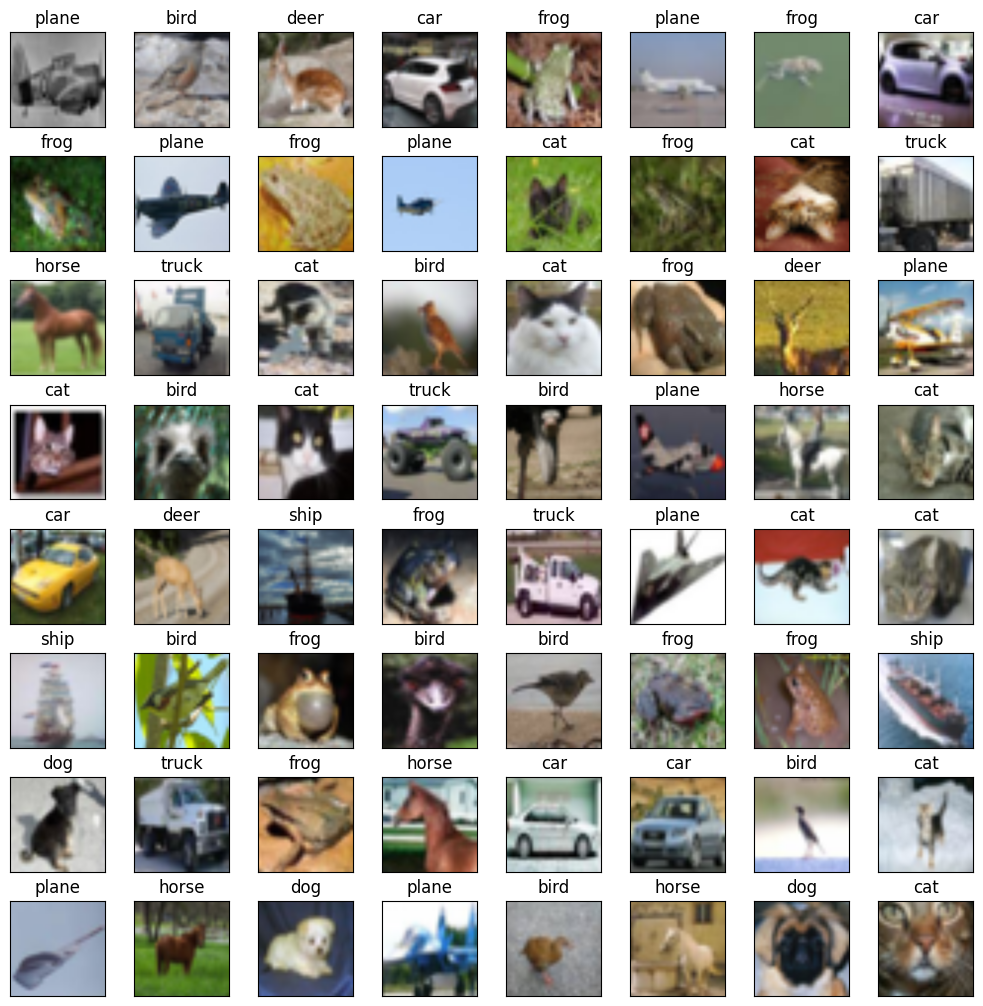

In [8]:
import matplotlib.pyplot as plt

xb, yb = next(iter(trainloader))

row_num, col_num = int(BATCH_SIZE/8), 8
fig, axs = plt.subplots(row_num, col_num, figsize=(10, 10 * row_num/col_num))

for row_idx in range(row_num):
    for col_idx in range(col_num):
        ax = axs[row_idx][col_idx]
        i = col_idx * row_num + row_idx
        
        class_index = yb[i].item()
        class_label = classes[class_index].split(",")[0]
        img = xb[i].permute(1,2,0)
        ax.title.set_text(class_label)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.imshow(img)
plt.tight_layout(pad=0.5)
plt.show()